In [1]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
import pandas as pd 
import seaborn as sns 
import statistics
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [56]:
%matplotlib inline

In [3]:
model_build_df = pd.read_csv('mydata/MMSA2021_train.csv')

In [4]:
#pd.set_option('display.max_columns', None)

In [5]:
pd.set_option('display.max_info_columns', 1000)
pd.set_option('display.max_info_rows', 1000000)

In [6]:
import io
buffer = io.StringIO()
model_build_df.info(buf=buffer)
info_str = buffer.getvalue()
#print(info_str)

In [7]:
model_build_df.sample(5)

,DISPCODE,STATERE1,CELPHON1,LADULT1,COLGSEX,LANDSEX,RESPSLCT,SAFETIME,CADULT1,CELLSEX,...,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_MMSA,_MMSAWT,SEQNO,MMSANAME
42645,1100.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,...,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,38900.0,321.056144,2.021001e+09,"b'Portland-Vancouver-Hillsboro, OR-WA, Metropo..."
125307,1100.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,...,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,39300.0,89.509285,2.021006e+09,"b'Providence-Warwick, RI-MA, Metropolitan Stat..."
148802,1100.0,1.0,2.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,47980.0,12.758455,2.021000e+09,"b'Watertown, SD, Micropolitan Statistical Area'"
60222,1100.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,2.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79,39300.0,131.737147,2.021005e+09,"b'Providence-Warwick, RI-MA, Metropolitan Stat..."
140220,1100.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,...,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,25540.0,133.892681,2.021001e+09,"b'Hartford-East Hartford-Middletown, CT, Metro..."


In [8]:
len(model_build_df)

151861

### Data Dictionary

In [9]:
from Extraction_module import description_dict

In [10]:
#Any variable with value counts below 14 with be turned to a categorical nominal datatype:
# Convert 'col1' from float to categorical
for col in model_build_df.columns:
    if len(model_build_df[col].value_counts()) < 15:
        model_build_df[col] = model_build_df[col].astype('category')


In [11]:
##Extract state from MMSANAME
def get_state(col):
    return col.split(',')[1]

model_build_df['STATE'] = model_build_df['MMSANAME'].apply(get_state)

In [12]:
model_build_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151861 entries, 0 to 151860
Data columns (total 153 columns):
 #    Column    Non-Null Count   Dtype   
---   ------    --------------   -----   
 0    DISPCODE  151861 non-null  category
 1    STATERE1  37094 non-null   category
 2    CELPHON1  37094 non-null   category
 3    LADULT1   37094 non-null   category
 4    COLGSEX   13 non-null      category
 5    LANDSEX   15568 non-null   category
 6    RESPSLCT  20603 non-null   category
 7    SAFETIME  114767 non-null  category
 8    CADULT1   114767 non-null  category
 9    CELLSEX   114766 non-null  category
 10   HHADULT   114766 non-null  float64 
 11   SEXVAR    151861 non-null  category
 12   GENHLTH   151860 non-null  category
 13   PHYSHLTH  151859 non-null  float64 
 14   MENTHLTH  151861 non-null  float64 
 15   POORHLTH  81991 non-null   float64 
 16   PRIMINSR  151860 non-null  category
 17   PERSDOC3  151861 non-null  category
 18   MEDCOST1  151860 non-null  category
 19   

### Handling Duplicate rows

In [13]:
duplicate_rows = model_build_df[model_build_df.duplicated()]
duplicate_rows

,DISPCODE,STATERE1,CELPHON1,LADULT1,COLGSEX,LANDSEX,RESPSLCT,SAFETIME,CADULT1,CELLSEX,...,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_MMSA,_MMSAWT,SEQNO,MMSANAME,STATE


### Generate EDA Report with Original Dataset

In [14]:
#profile = ProfileReport(model_build_df)
#profile.to_file(output_file="mydata/EDA_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Handling Missing Data

In [15]:
#Step1 Remove Columns that have more than 50% missing values

def columns_with_high_null_percentage(df, threshold=0.9):
    """
    Get the columns with null values exceeding the specified threshold in a DataFrame.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        threshold (float): The threshold for null values (default is 0.9, meaning 90%).

    Returns:
        List[str]: A list of column names with null values exceeding the threshold.
    """
    null_percentages = (df.isnull().sum() / len(df)).sort_values(ascending=False)
    high_null_columns = null_percentages[null_percentages > threshold].index.tolist()
    return high_null_columns

high_null_columns = columns_with_high_null_percentage(model_build_df, threshold=0.4)
print(high_null_columns)


['COLGSEX', 'NUMPHON3', 'LANDSEX', 'CAGEG', 'DIABAGE3', 'RESPSLCT', 'ASTHNOW', 'PREGNANT', 'CELPHON1', 'LADULT1', 'NUMHHOL3', 'STATERE1', 'ARTHEXER', 'LMTJOIN3', 'ARTHEDU', 'ARTHDIS2', 'JOINPAI2', 'HIVTSTD3', '_FLSHOT7', '_PNEUMO3', 'SMOKDAY2', 'BPMEDS', 'IMFVPLA2', 'FLSHTMY3', 'MAXDRNKS', 'DRNK3GE5', 'AVEDRNK3', 'POORHLTH']


In [16]:
model_build_df_1 = model_build_df.drop(columns=high_null_columns)
model_build_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151861 entries, 0 to 151860
Data columns (total 125 columns):
 #    Column    Non-Null Count   Dtype   
---   ------    --------------   -----   
 0    DISPCODE  151861 non-null  category
 1    SAFETIME  114767 non-null  category
 2    CADULT1   114767 non-null  category
 3    CELLSEX   114766 non-null  category
 4    HHADULT   114766 non-null  float64 
 5    SEXVAR    151861 non-null  category
 6    GENHLTH   151860 non-null  category
 7    PHYSHLTH  151859 non-null  float64 
 8    MENTHLTH  151861 non-null  float64 
 9    PRIMINSR  151860 non-null  category
 10   PERSDOC3  151861 non-null  category
 11   MEDCOST1  151860 non-null  category
 12   CHECKUP1  151861 non-null  category
 13   EXERANY2  151861 non-null  category
 14   BPHIGH6   151861 non-null  category
 15   CHOLCHK3  151861 non-null  category
 16   TOLDHI3   131964 non-null  category
 17   CHOLMED3  131786 non-null  category
 18   CVDINFR4  151861 non-null  category
 19   

<Axes: >

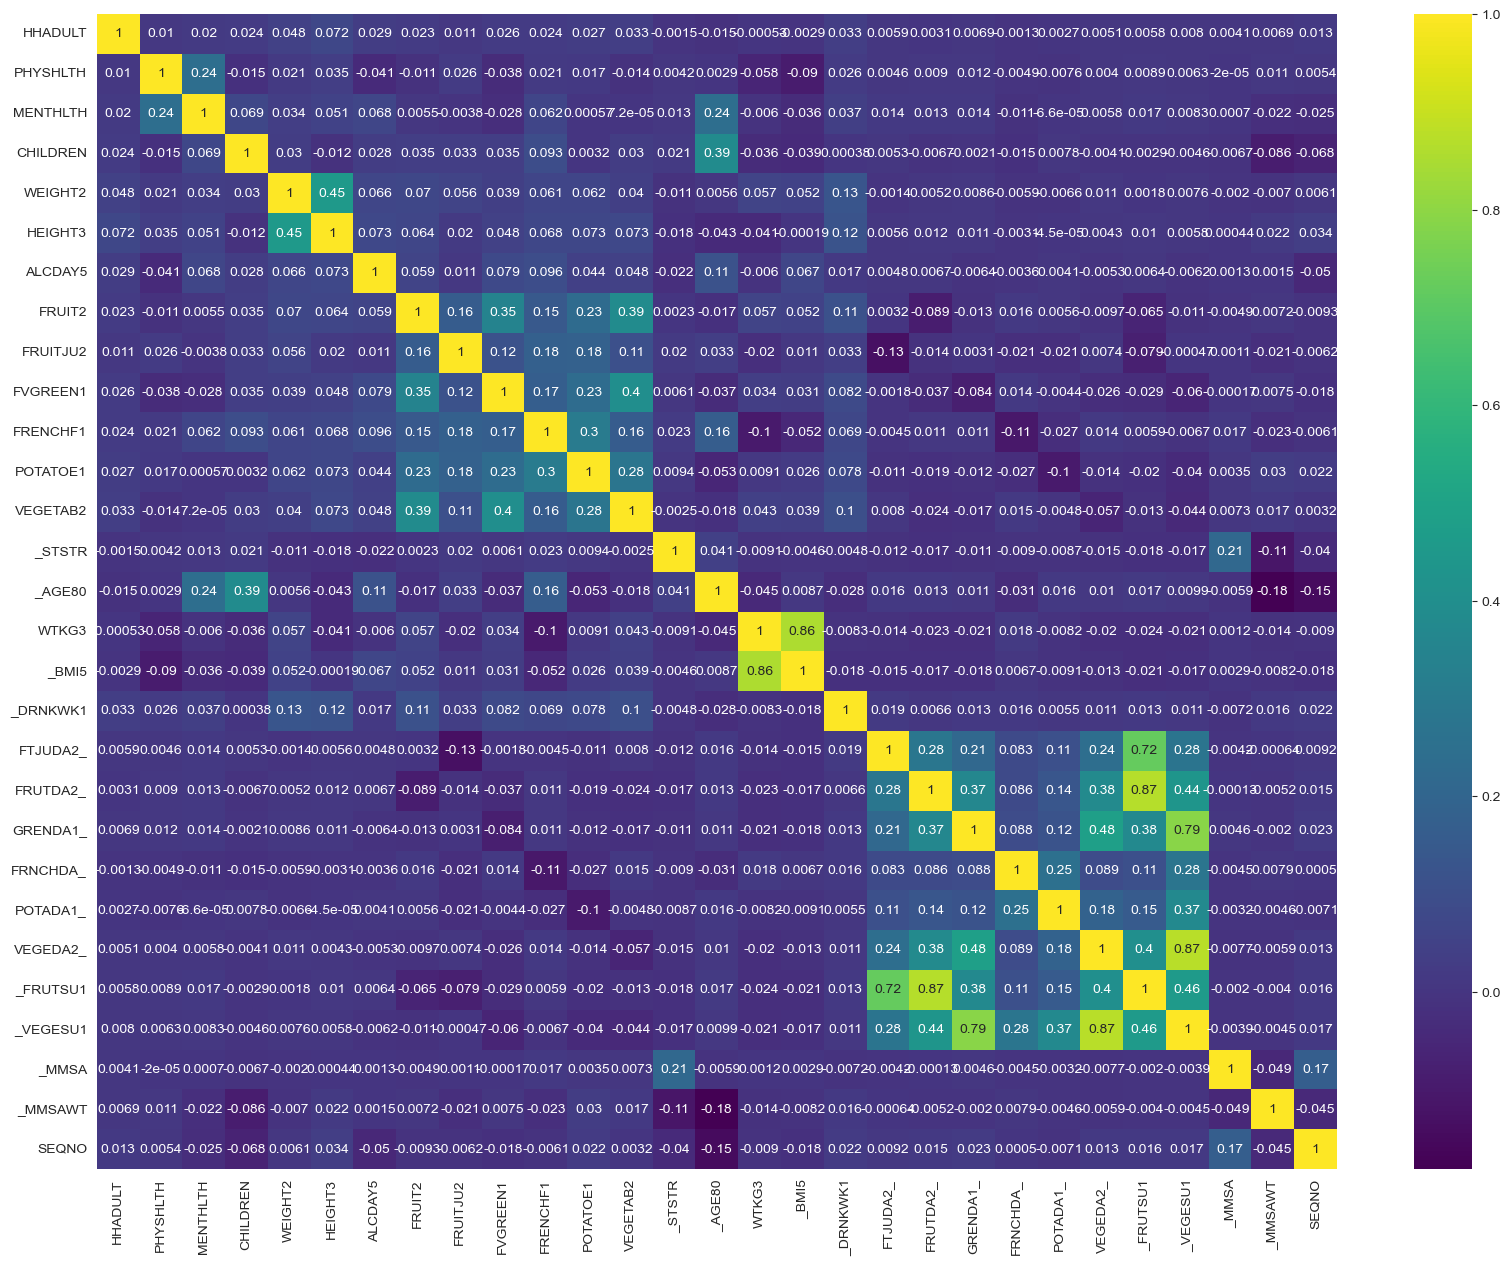

In [64]:
#Step3 Remove Highly correlated Columns 
plt.figure(figsize=(20,15))
num_cols = model_build_df_1.select_dtypes(exclude='category').columns
sns.heatmap(model_build_df_1[num_cols].corr(),cmap='viridis',annot=True)

In [ ]:
#COLUMNS WITH HIGH CORRELATION

_FRUTSU1(TOTAL FRUITS CONSUMED PER DAY) AND FRUTDA2

In [65]:
#profile = ProfileReport(model_build_df)
#profile.to_file(output_file="mydata/EDA_Report_No_NA.html")

## ANSWERING THE RESEARCH QUESTIONS 

How do dietary habits and nutrition shape an individual's health outcome?
- we know that studies have shown that high fiber intake is associated with lower mortality.
as seen in this comparative study https://pubmed.ncbi.nlm.nih.gov/22648726/. 
- we would like to see how a high vegetable/fruit diet may be associated with a person percieved health. 
- the darker the vegetables the higher the fibre content

In [21]:
#Columns of interest would be nutrition and diet related columns:
nutrition_cols = []
for key, value in description_dict.items():
    if any(sub in str(value).lower() for sub in ['fruit','vegetable','fruits','vegetables']):
        nutrition_cols.append(key)

In [22]:
nutrition_cols

['ALCDAY5',
 'AVEDRNK3',
 'FRUIT2',
 'FRUITJU2',
 'FVGREEN1',
 'FRENCHF1',
 'VEGETAB2',
 'FTJUDA2_',
 'FRUTDA2_',
 'GRENDA1_',
 'FRNCHDA_',
 'POTADA1_',
 'VEGEDA2_',
 '_MISFRT1',
 '_MISVEG1',
 '_FRTRES1',
 '_VEGRES1',
 '_FRUTSU1',
 '_VEGESU1',
 '_FRTLT1A',
 '_VEGLT1A',
 '_FRT16A',
 '_VEG23A',
 '_FRUITE1',
 '_VEGETE1']

In [23]:
#drop alcolhol related columns 
nutrition_cols = nutrition_cols[2:]
for col in nutrition_cols:
    print(description_dict[col])

description of FRUIT2: 44 
8 June 2022   Core Section 15: Fruits and Vegetables  
 
Question 
Number  Question text  Variable 
names  Responses  
(DO NOT 
READ UNLESS 
OTHERWISE 
NOTED)  SKIP INFO/ 
CATI Note  Interviewer Note (s)  Column(s)  
CFV.01  Now think about 
the foods you 
ate or drank 
during the past 
month, that is, 
the past 30 days, 
including meals 
and snacks.  
Not including 
juices, how 
often did you 
eat fruit? You 
can tell me 
times per day, 
times per week 
or times per 
month.   FRUIT2  1_ _ Day  
2_ _ Week  
3_ _ Month  
300 Less than 
once a month  
555 Never  
777 Don’t 
Know  
999 Refused   If a respondent 
indicates that they 
consume a food 
item every day then 
enter the number of 
times per day.  If 
the respondent 
indicates that they 
eat a food less than 
daily, then enter 
times p er week or 
time per month.  Do 
not enter time per 
day unless the 
respondent reports 
that he/she 
consumed that food 
item each day 
during the past 
month.  
Enter qu

In [24]:
pd.set_option('display.max_columns', None)

In [25]:
#make a dataframe by combining nutrition columns with health status, health days columns  
nutrition_cols = nutrition_cols + ['GENHLTH','PHYSHLTH','POORHLTH','_RFHLTH','_PHYS14D','_MENT14D']
df_nutrition = model_build_df[nutrition_cols]

In [26]:
df_nutrition.head()

,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,VEGETAB2,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,GENHLTH,PHYSHLTH,POORHLTH,_RFHLTH,_PHYS14D,_MENT14D
0,207.0,307.0,307.0,302.0,101.0,2.300000e+01,100.0,23.0,7.0,23.0,1.000000e+02,5.397605e-79,5.397605e-79,1.0,1.0,123.0,153.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,1.0,88.0,NaN,1.0,1.0,1.0
1,312.0,101.0,101.0,101.0,555.0,1.000000e+02,40.0,100.0,100.0,100.0,5.397605e-79,5.397605e-79,5.397605e-79,1.0,1.0,140.0,300.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,4.0,17.0,28.0,2.0,3.0,3.0
2,101.0,300.0,201.0,104.0,207.0,2.000000e+00,100.0,14.0,400.0,43.0,1.000000e+02,5.397605e-79,5.397605e-79,1.0,1.0,102.0,557.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,88.0,NaN,1.0,1.0,1.0
3,102.0,555.0,203.0,302.0,101.0,5.397605e-79,200.0,43.0,7.0,14.0,1.000000e+02,5.397605e-79,5.397605e-79,1.0,1.0,200.0,164.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,88.0,NaN,1.0,1.0,1.0
4,102.0,555.0,204.0,301.0,101.0,5.397605e-79,200.0,57.0,3.0,43.0,1.000000e+02,5.397605e-79,5.397605e-79,1.0,1.0,200.0,203.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,88.0,NaN,1.0,1.0,1.0


In [27]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(df_nutrition.corr(),cmap='viridis',annot=True, annot_kws={"size": 8})

### Looking at the data we could use the calculated Total calcualted variables per day for the fruits and vegetables to see its relation to general health 

In [28]:
#_FRUTSU1=(FTJUDA2_/100) + (FRUTDA2_/100); 
#_FRUTSU1=round((_FRUTSU1*100),1); 

#WE CAN MAKE A TOTAL FRUITS PER DAY COLUMN 
df_nutrition['Total_fruits_daily'] = df_nutrition['_FRUTSU1'].apply(lambda x: round(x/100,1) )
df_nutrition.head()

,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,VEGETAB2,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,GENHLTH,PHYSHLTH,POORHLTH,_RFHLTH,_PHYS14D,_MENT14D,Total_fruits_daily
0,207.0,307.0,307.0,302.0,101.0,2.300000e+01,100.0,23.0,7.0,23.0,1.000000e+02,5.397605e-79,5.397605e-79,1.0,1.0,123.0,153.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,1.0,88.0,NaN,1.0,1.0,1.0,1.2
1,312.0,101.0,101.0,101.0,555.0,1.000000e+02,40.0,100.0,100.0,100.0,5.397605e-79,5.397605e-79,5.397605e-79,1.0,1.0,140.0,300.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,4.0,17.0,28.0,2.0,3.0,3.0,1.4
2,101.0,300.0,201.0,104.0,207.0,2.000000e+00,100.0,14.0,400.0,43.0,1.000000e+02,5.397605e-79,5.397605e-79,1.0,1.0,102.0,557.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,88.0,NaN,1.0,1.0,1.0,1.0
3,102.0,555.0,203.0,302.0,101.0,5.397605e-79,200.0,43.0,7.0,14.0,1.000000e+02,5.397605e-79,5.397605e-79,1.0,1.0,200.0,164.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,88.0,NaN,1.0,1.0,1.0,2.0
4,102.0,555.0,204.0,301.0,101.0,5.397605e-79,200.0,57.0,3.0,43.0,1.000000e+02,5.397605e-79,5.397605e-79,1.0,1.0,200.0,203.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,88.0,NaN,1.0,1.0,1.0,2.0


In [29]:
df_nutrition['Total_fruits_daily'].value_counts().head(20)

1.0    22835
2.0    17404
1.1     7767
3.0     7618
0.4     7465
0.3     6924
0.6     6785
0.7     6678
0.1     5975
1.3     4205
0.0     3906
0.5     3678
0.2     3529
1.4     3273
2.1     3005
0.9     2714
4.0     2642
0.8     2023
2.3     1427
1.2     1303
Name: Total_fruits_daily, dtype: int64

In [30]:
#_VEGESU1=(GRENDA1_/100) + (FRNCHDA_/100) + (POTADA1_/100) + 
#(VEGEDA2_/100); 
#_VEGESU1=round((_VEGESU1*100),1); 

#WE CAN MAKE A TOTAL VEGETABLES PER DAY COLUMN 
df_nutrition['Total_vegetables_daily'] = df_nutrition['_VEGESU1'].apply(lambda x: round(x/100,1))
df_nutrition.head()

,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,VEGETAB2,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,GENHLTH,PHYSHLTH,POORHLTH,_RFHLTH,_PHYS14D,_MENT14D,Total_fruits_daily,Total_vegetables_daily
0,207.0,307.0,307.0,302.0,101.0,2.300000e+01,100.0,23.0,7.0,23.0,1.000000e+02,5.397605e-79,5.397605e-79,1.0,1.0,123.0,153.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,1.0,88.0,NaN,1.0,1.0,1.0,1.2,1.5
1,312.0,101.0,101.0,101.0,555.0,1.000000e+02,40.0,100.0,100.0,100.0,5.397605e-79,5.397605e-79,5.397605e-79,1.0,1.0,140.0,300.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,4.0,17.0,28.0,2.0,3.0,3.0,1.4,3.0
2,101.0,300.0,201.0,104.0,207.0,2.000000e+00,100.0,14.0,400.0,43.0,1.000000e+02,5.397605e-79,5.397605e-79,1.0,1.0,102.0,557.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,88.0,NaN,1.0,1.0,1.0,1.0,5.6
3,102.0,555.0,203.0,302.0,101.0,5.397605e-79,200.0,43.0,7.0,14.0,1.000000e+02,5.397605e-79,5.397605e-79,1.0,1.0,200.0,164.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,88.0,NaN,1.0,1.0,1.0,2.0,1.6
4,102.0,555.0,204.0,301.0,101.0,5.397605e-79,200.0,57.0,3.0,43.0,1.000000e+02,5.397605e-79,5.397605e-79,1.0,1.0,200.0,203.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,88.0,NaN,1.0,1.0,1.0,2.0,2.0


In [31]:
df_nutrition['Total_vegetables_daily'].value_counts().head(20)

1.6    7680
1.4    7393
1.7    6581
1.3    6551
1.1    6093
2.0    5821
2.1    5538
1.9    5289
1.0    5095
1.2    4674
2.3    4418
0.9    4336
1.5    4328
0.7    3612
0.8    3474
2.4    3325
0.6    3285
2.2    3247
1.8    2966
2.6    2859
Name: Total_vegetables_daily, dtype: int64

In [32]:
df_nutrition.describe([0.25,0.5,0.75,0.99]).T

,count,mean,std,min,25%,50%,75%,99%,max
FRUIT2,138991.0,191.060939,136.489549,1.010000e+02,1.010000e+02,130.0,205.0,777.00,999.0
FRUITJU2,138378.0,372.546402,186.383821,1.010000e+02,2.020000e+02,304.0,555.0,777.00,999.0
FVGREEN1,137940.0,241.202472,135.315096,1.010000e+02,2.010000e+02,203.0,302.0,777.00,999.0
FRENCHF1,137525.0,304.432060,137.809316,1.010000e+02,2.020000e+02,301.0,305.0,777.00,999.0
VEGETAB2,136657.0,200.892263,131.049975,1.010000e+02,1.010000e+02,202.0,206.0,777.00,999.0
FTJUDA2_,135414.0,48.547447,406.925062,5.397605e-79,5.397605e-79,3.0,30.0,300.00,9900.0
FRUTDA2_,135801.0,144.549679,562.784667,5.397605e-79,4.300000e+01,100.0,100.0,700.00,9900.0
GRENDA1_,135552.0,89.389577,539.784914,5.397605e-79,1.400000e+01,43.0,71.0,500.00,9900.0
FRNCHDA_,135224.0,25.408234,180.400523,5.397605e-79,3.000000e+00,14.0,29.0,100.00,9900.0
POTADA1_,133965.0,28.285298,193.938916,5.397605e-79,7.000000e+00,14.0,29.0,143.00,9900.0


In [33]:
#lets filter data to remove outliers 
filtered_df = df_nutrition[(df_nutrition['Total_fruits_daily'] <= 9.0) & 
                           (df_nutrition['Total_vegetables_daily'] <= 26.6396)]

In [34]:
len(filtered_df)

125295

In [35]:
#Distribution of Total_fruits_daily
sns.histplot(x=filtered_df['Total_vegetables_daily'])

<Axes: xlabel='Total_vegetables_daily', ylabel='Count'>

In [36]:
#Distribution of Total_vegetables_daily
sns.histplot(x=filtered_df['Total_fruits_daily'])

<Axes: xlabel='Total_vegetables_daily', ylabel='Count'>

In [37]:
#create a BOX PLOT FOR _RFHLTH Vs Total fruits 
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.boxplot(data=filtered_df, x='Total_fruits_daily', y='_RFHLTH')

<Axes: xlabel='Total_fruits_daily', ylabel='_RFHLTH'>

In [38]:
#CREATE A SCATTERPLOT FOR PHYSHLTH(Number of days of poor physical health) Vs Total fruits consued daily
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.boxplot(data=filtered_df, y='Total_fruits_daily', x='_PHYS14D')

<Axes: xlabel='_PHYS14D', ylabel='Total_fruits_daily'>

In [39]:
#create a BOX PLOT FOR _RFHLTH Vs Total_vegetables_daily
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.boxplot(data=filtered_df, x='Total_vegetables_daily', y='_RFHLTH')

<Axes: xlabel='Total_vegetables_daily', ylabel='_RFHLTH'>

In [40]:
#Lets create a pivot table showing the mean fruits and vegetables consumed per day for each _RFHLTH group 

pivot_result = pd.pivot_table(filtered_df, values=['Total_fruits_daily','Total_vegetables_daily'],index='_RFHLTH', aggfunc='mean')

#Only looking at those who reported Good health vs those that reported poor/bad health
pivot_result[0:2]

,Total_fruits_daily,Total_vegetables_daily
_RFHLTH,,
1.0,1.360719,1.961105
2.0,1.258927,1.728446


- This analysis shows that those who reported good or better health had a higher mean daily intake of fruits and vegetables. Not a significant difference.

### Apply association rules between eating fruits and vegetables and good percieved health

In [41]:
#!pip install mlxtend

In [42]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Assuming you already have a DataFrame called filtered_df with 'Total_fruits_daily', 'Total_vegetables_daily' and '_RFHLTH' columns

# Binning Total_fruits_daily
fruit_bins = [0, 2, 4, 10]  # Adjust bins as per your data distribution for fruits
fruit_labels = ['Low_Fruit', 'Medium_Fruit', 'High_Fruit']
filtered_df['Fruit_Intake_Binned'] = pd.cut(filtered_df['Total_fruits_daily'], bins=fruit_bins, labels=fruit_labels, include_lowest=True)

# Binning Total_vegetables_daily
veg_bins = [0, 8, 16, 26]  # Adjust bins as per your data distribution for vegetables
veg_labels = ['Low_Veg', 'Medium_Veg', 'High_Veg']
filtered_df['Veg_Intake_Binned'] = pd.cut(filtered_df['Total_vegetables_daily'], bins=veg_bins, labels=veg_labels, include_lowest=True)

# Convert to the binary format
filtered_df_binary = pd.get_dummies(filtered_df[['Fruit_Intake_Binned', 'Veg_Intake_Binned', '_RFHLTH']])

# Apply Apriori to find frequent itemsets
frequent_itemsets = apriori(filtered_df_binary, min_support=0.1, use_colnames=True)

# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                                          antecedents  \
0                         (Veg_Intake_Binned_Low_Veg)   
1                     (Fruit_Intake_Binned_Low_Fruit)   
2                                       (_RFHLTH_2.0)   
3                     (Fruit_Intake_Binned_Low_Fruit)   
4                  (Fruit_Intake_Binned_Medium_Fruit)   
5                                       (_RFHLTH_1.0)   
6                         (Veg_Intake_Binned_Low_Veg)   
7                                       (_RFHLTH_2.0)   
8        (_RFHLTH_1.0, Fruit_Intake_Binned_Low_Fruit)   
9                         (Veg_Intake_Binned_Low_Veg)   
10           (Veg_Intake_Binned_Low_Veg, _RFHLTH_2.0)   
11  (Veg_Intake_Binned_Low_Veg, Fruit_Intake_Binne...   
12       (_RFHLTH_2.0, Fruit_Intake_Binned_Low_Fruit)   
13                        (Veg_Intake_Binned_Low_Veg)   
14                                      (_RFHLTH_2.0)   
15                    (Fruit_Intake_Binned_Low_Fruit)   
16  (Veg_Intake_Binned_Low_Veg,

/Users/obinnadinneya/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


What is the role of access to healthcare,marriage status, Education and income in predicting health outcomes?

In [43]:
#Get the columns related to access to healthcare,

In [44]:
#make a dataframe by combining acess to healthcare columns with health status, health days columns  

In [45]:
#Do some EDA analysis and correlation analysis to see if there are relationships btw acess to healthcare and percieved
#health

In [46]:
#Apply association rules between acess to healthcare and good percieved health

Can lifestyle factors, including smoking and alcohol consumption, 
predict health risks and outcomes?

In [47]:
#Get the columns related to alcohol consumption and smoking

In [48]:
#Get the columns related to exercise

How predictable are chronic diseases, such as diabetes and hypertension, through a combined analysis of 
lifestyle factors and genetic predisposition?

What is the significant contribution of mental health factors, such as stress, anxiety, 
and depression, to health outcomes, and what pathways influence overall well-being?